p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

adjuvant vs. MASPpepK: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.120e-04 U_stat=4.570e+02
MASPpepK vs. NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.975e-01 U_stat=3.510e+02
NGP24h vs. MASPpepK + NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.674e-03 U_stat=1.390e+02
adjuvant vs. NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.478e-06 U_stat=5.110e+02
MASPpepK vs. MASPpepK + NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.509e-01 U_stat=2.080e+02
adjuvant vs. MASPpepK + NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.762e-02 U_stat=3.800e+02


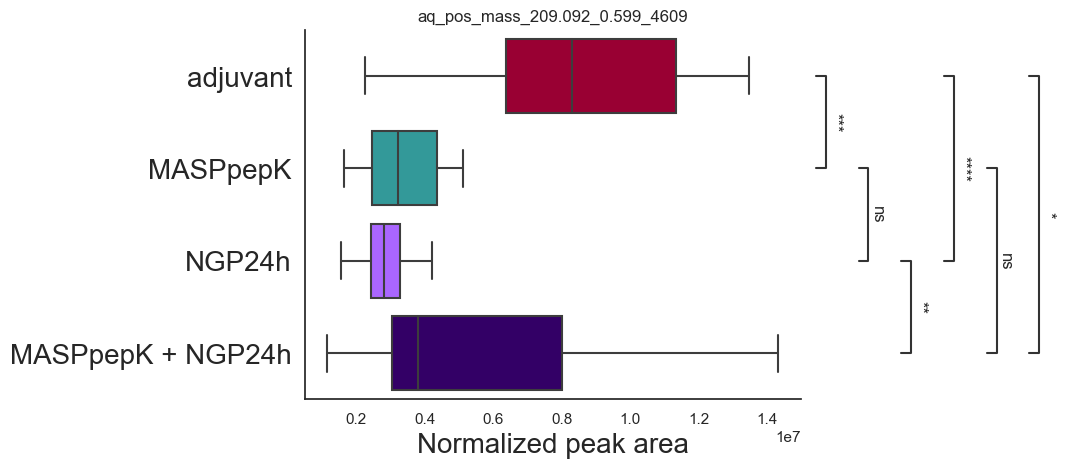

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

M_F_data = pandas.read_csv('06232022-pos-M-F-filtered.csv')
full_mass_data = pandas.read_csv("metabolite-cluster-ID-4609.csv")
mass_list = full_mass_data.features.to_list()

# change the theme of the plot
sns.set_theme(style="white")
plt.rc('ytick',labelsize=20)

# order is the list of group names
order = ['adjuvant', 'MASPpepK', 'NGP24h', 'MASPpepK + NGP24h']

list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []
list_6 = []

mass_list_number = 1
for mass in mass_list:
    fig1, ax1 = plt.subplots()
    ax1.set_title(mass)
    g1 = sns.boxplot(x=M_F_data[str(mass)] , y=M_F_data['Group_Short'], palette="tab10", showfliers = False, order = order)
    annot_1 = Annotator(g1, [("adjuvant", "MASPpepK"),
                             ("adjuvant", "NGP24h"),
                             ("adjuvant", "MASPpepK + NGP24h"),
                             ("MASPpepK", "NGP24h"),
                             ("MASPpepK", "MASPpepK + NGP24h"),
                             ("NGP24h", "MASPpepK + NGP24h")], x=M_F_data[str(mass)], y=M_F_data['Group_Short'], order=order, orient='h')
    annot_1.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_1.apply_test()
    g1, test_results = annot_1.annotate()
    g1.patches[0].set_facecolor('#990033')
    g1.patches[1].set_facecolor('#339999')
    g1.patches[2].set_facecolor('#AA66FF')
    g1.patches[3].set_facecolor('#330066')
    stat_results = [(result.data.pvalue) for result in test_results]
    group1_name = [(result.data.group1) for result in test_results]
    group2_name = [(result.data.group2) for result in test_results]
    list_1.append(stat_results[0])
    list_2.append(stat_results[1])
    list_3.append(stat_results[2])
    list_4.append(stat_results[3])
    list_5.append(stat_results[4])
    list_6.append(stat_results[5])
    # change x y axis label name
    ax1.set_ylabel('')
    ax1.set_xlabel('Normalized peak area', fontsize = 20)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    # change the output name
    plt.savefig("boxplot_pos_CD4_" + str(mass_list_number) + "_" + str(mass) + ".png", dpi=300, bbox_inches='tight')
    mass_list_number += 1
    
list1_name = group1_name[0] + "_VS_" + group2_name[0]
list2_name = group1_name[1] + "_VS_" + group2_name[1]
list3_name = group1_name[2] + "_VS_" + group2_name[2]
list4_name = group1_name[3] + "_VS_" + group2_name[3]
list5_name = group1_name[4] + "_VS_" + group2_name[4]
list6_name = group1_name[5] + "_VS_" + group2_name[5]